# HW1  Try out gradient descent

## Due Monday April 25th, 2022 at 11:59PM

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{25}(2 w^3 + w + 5)$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:

In [8]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha, max_its, w0):
    cost_history = []
    w_curr = w0
    for x in range(max_its):
        cost_history.append(1/50 * (w_curr**4 + w_curr**2 + 10*w_curr - 50))
        w_curr = w_curr - alpha * 1/25 * (2 * w_curr**3 + w_curr + 5)
    return cost_history

3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.0
max_its = 1000

# first run
alpha = 1
# second run
alpha = 0.1
# third run
alpha = 0.01


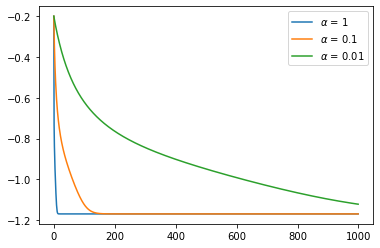

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

run_1 = gradient_descent(1, 1000, 2.0)
run_2 = gradient_descent(0.1, 1000, 2.0)
run_3 = gradient_descent(0.01, 1000, 2.0)

plt.plot(run_1, label = r'$\alpha$ = 1')
plt.plot(run_2, label = r'$\alpha$ = 0.1')
plt.plot(run_3, label = r'$\alpha$ = 0.01')
plt.legend()

For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

Yes, even though this function is not continuous, it is convex, as we can take any two points and their line segment on the graph of the function will lie above or on the graph. It's gobal minimum lies at $w=0$.

5) [5 points] What is the derivative of the cost function? 

$\frac{d}{dw}g(w) = \frac{w}{|w|}, \forall w \in \mathbb{R} \backslash \{0\}$

6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost function g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [49]:
pip install autograd

     |████████████████████████████████| 48 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
from autograd import grad 

def g(w):
    return abs(w)

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  
    weight_history = []
    cost_history = []
    w_curr = w0
    for x in range(max_its):
        weight_history.append(w_curr)
        cost_history.append(g(w_curr))
        w_curr = w_curr - alpha * gradient(w_curr)
    return weight_history, cost_history

7) [10 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

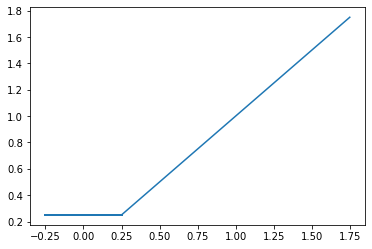

In [39]:
weight_history, cost_history = gradient_descent(g, 0.5, 20, 1.75)
plt.plot(weight_history, cost_history)

8) [15 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

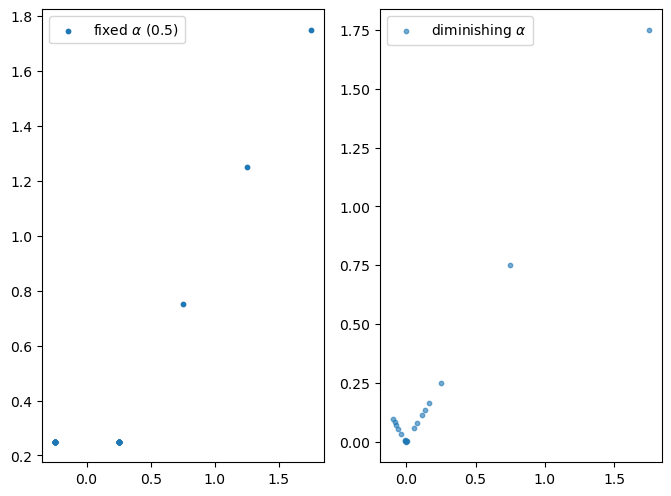

In [138]:
from autograd import grad 
from matplotlib.pyplot import figure

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function 
    weight_history = []
    cost_history = []
    w_curr = w0
    if alpha == 'diminishing':
        for x in range(max_its):
            weight_history.append(w_curr)
            cost_history.append(g(w_curr))
            w_curr = w_curr - 1/(x+1) * gradient(w_curr)
    else:
        for x in range(max_its):
            weight_history.append(w_curr)
            cost_history.append(g(w_curr))
            w_curr = w_curr - alpha * gradient(w_curr)
    return weight_history, cost_history

weight_history_dim, cost_history_dim = gradient_descent(g, 'diminishing', 20, 1.75)

figure(figsize = (8, 6), dpi = 100)

plt.subplot(1, 2, 1)
plt.scatter(weight_history, cost_history, s = 10, label = r'fixed $\alpha$ (0.5)')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(weight_history_dim, cost_history_dim, s = 10, alpha = 0.6 , label = r'diminishing $\alpha$')
plt.legend()

9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why ?

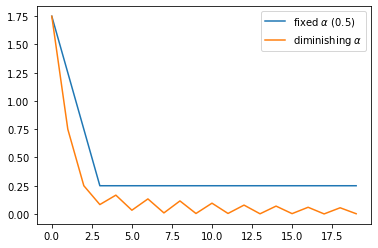

In [68]:
plt.plot(cost_history, label = r'fixed $\alpha$ (0.5)')
plt.plot(cost_history_dim, label = r'diminishing $\alpha$')
plt.legend()

The run with diminishing alpha works better. Since the absolute value of the gradient is constant, we face the problem of overstepping the true minimum of $g$ using a constant alpha. Thus, it is beneficial to use the diminishing rule $\alpha = \frac{1}{k}$ to decrease our step size with each step as we approach the minimum of $g$.

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [ ]:
import numpy as np
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function 
    weight_history = []
    cost_history = []
    w_curr = w0
    if alpha == 'diminishing':
        for x in range(max_its):
            weight_history.append(w_curr)
            cost_history.append(g(w_curr))
            w_curr = w_curr - 1/(x+1) * gradient(w_curr)
    else:
        for x in range(max_its):
            weight_history.append(w_curr)
            cost_history.append(g(w_curr))
            w_curr = w_curr - alpha * gradient(w_curr)
    return weight_history, cost_history

11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



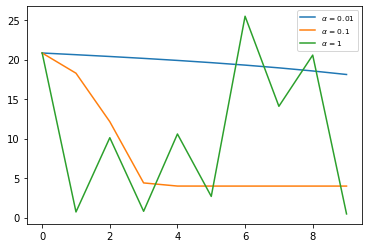

In [85]:
import autograd.numpy as np

def g(w):
    return w[0]**2 + w[1]**2 + 2*np.sin(1.5 * (w[0] + w[1])) + 2

w0 = np.array([3.0, 3.0])

run_1 = gradient_descent(g, 0.01, 10, w0)[1]
run_2 = gradient_descent(g, 0.1, 10, w0)[1]
run_3 = gradient_descent(g, 1, 10, w0)[1]

plt.plot(run_1, label = r'$\alpha$ = 0.01')
plt.plot(run_2, label = r'$\alpha$ = 0.1')
plt.plot(run_3, label = r'$\alpha$ = 1')
plt.legend(loc = 1, prop={'size': 7.5})

Using $\alpha = 1$ leads to overstepping and thus to oscillating behavior.

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$ 

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

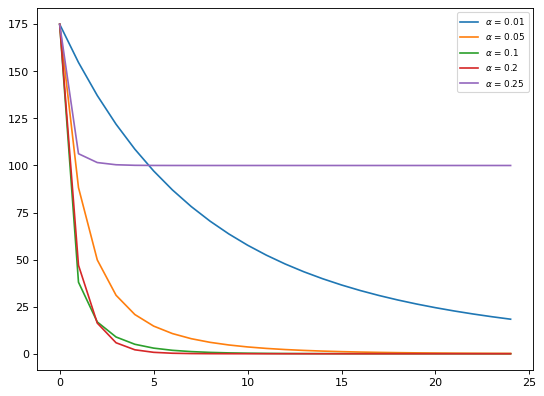

In [131]:
def g(w):
    return 2 * w[0]**2 + w[1]**2 + 4* w[2]**2

w0 = np.array([5.0, 5.0, 5.0])

run_1 = gradient_descent(g, 0.01, 25, w0)[1]
run_2 = gradient_descent(g, 0.05, 25, w0)[1]
run_3 = gradient_descent(g, 0.1, 25, w0)[1]
run_4 = gradient_descent(g, 0.2, 25, w0)[1]
run_5 = gradient_descent(g, 0.25, 25, w0)[1]

figure(figsize = (8, 6), dpi = 80)

plt.plot(run_1, label = r'$\alpha$ = 0.01')
plt.plot(run_2, label = r'$\alpha$ = 0.05')
plt.plot(run_3, label = r'$\alpha$ = 0.1')
plt.plot(run_4, label = r'$\alpha$ = 0.2')
plt.plot(run_5, label = r'$\alpha$ = 0.25')
plt.legend(loc = 1, prop={'size': 8})

Even though $\alpha = 0.1$ and $\alpha = 0.2$ converge at a very similar rate, it seems like $\alpha = 0.2$ is converges slightly faster. Interestingly, $\alpha = 0.25$, does not converge to the global minimum at all.

# Bonus Question!

[10 points] This is an open-ended question. Can you find a way to speed up your gradient descent algorithm implemented above? Please provide the code below: